In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import pybaseball as pb
import pandas as pd


In [2]:
# import pybaseball as pb

# batting_stats_2025 = pb.batting_stats(start_season=2025, end_season=2025)

# batting_stats_2025 = batting_stats_2025[[
#     'IDfg', 'Season', 'Name', 'Team', 'Age',  # Basic Identifiers
#     'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR',  # Volume Metrics
#     'AVG', 'SLG', 'ISO', 'OBP', 'OPS',  # Rate and Power Metrics
#     'BB%', 'K%', 'BB/K', 'wOBA', 'wRC', 'wRC+',  # Advanced Metrics
#     'LD%', 'GB%', 'FB%', 'HR/FB',  # Batted Ball Profile
#     'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',  # Contact Quality
#     'EV', 'LA', 'Barrels', 'Barrel%', 'HardHit%', 'maxEV'  # Statcast (if available)
# ]]

# print(batting_stats_2025.head())
# batting_stats_2025.to_csv('batting_stats_2025.csv', index=False)


In [3]:
# import pandas as pd
# import pybaseball as pb

# # Get all batting stats from 1900 to 2025
# all_years = []
# for year in range(1900, 2026):
#     try:
#         data = pb.batting_stats(start_season=year, end_season=year)
#         data['Season'] = year
#         all_years.append(data)
#     except Exception as e:
#         print(f"Failed to load data for {year}: {e}")

# # Combine into one DataFrame
# batting_stats_all = pd.concat(all_years, ignore_index=True)

# # Filter only the relevant columns
# columns_to_keep = [
#     'IDfg', 'Season', 'Name', 'Team', 'Age',
#     'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR',
#     'AVG', 'SLG', 'ISO', 'OBP', 'OPS',
#     'BB%', 'K%', 'BB/K', 'wOBA', 'wRC', 'wRC+',
#     'LD%', 'GB%', 'FB%', 'HR/FB',
#     'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',
#     'EV', 'LA', 'Barrels', 'Barrel%', 'HardHit%', 'maxEV'
# ]

# # Some older seasons may be missing advanced/statcast stats — drop missing columns if needed
# columns_present = [col for col in columns_to_keep if col in batting_stats_all.columns]
# batting_stats_all = batting_stats_all[columns_present]

# # Save to CSV
# batting_stats_all.to_csv('batting_stats_1900_2025.csv', index=False)

# print("Data from 1900–2025 saved to 'batting_stats_1900_2025.csv'")


In [4]:
#increasing power era 1920 to 1960

batting_stats_all = pd.read_csv('batting_stats_1900_2025.csv')

clean_era = batting_stats_all[(batting_stats_all['Season'] >= 2005) & (batting_stats_all['Season'] <= 2014)]
filtered_incr_power_era = clean_era.dropna(axis=1, how='all')
filtered_incr_power_era


,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,GB%,FB%,HR/FB,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,Barrels
12549,1274,2005,Alex Rodriguez,NYY,29,162,605,715,194,116,...,0.448,0.397,0.258,0.469,0.318,0.213,0.143,0.488,0.369,NaN
12550,96,2005,Andruw Jones,ATL,28,160,586,672,154,76,...,0.420,0.420,0.252,0.553,0.285,0.162,0.137,0.489,0.374,NaN
12551,1177,2005,Albert Pujols,STL,25,161,591,700,195,114,...,0.418,0.382,0.203,0.469,0.285,0.246,0.127,0.484,0.389,NaN
12552,1679,2005,Chase Utley,PHI,26,147,543,628,158,85,...,0.350,0.418,0.152,0.447,0.322,0.231,0.143,0.488,0.370,NaN
12553,525,2005,Derrek Lee,CHC,29,158,594,691,199,100,...,0.386,0.394,0.237,0.433,0.270,0.297,0.108,0.484,0.409,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047,3179,2014,Dioner Navarro,TOR,30,139,481,520,132,98,...,0.399,0.360,0.081,0.443,0.304,0.253,0.161,0.574,0.265,0.0
14048,3917,2014,Dayan Viciedo,CHW,25,145,523,563,121,75,...,0.458,0.369,0.141,0.366,0.354,0.280,0.188,0.480,0.332,0.0
14049,3154,2014,Domonic Brown,PHI,26,144,473,512,111,78,...,0.499,0.327,0.079,0.381,0.360,0.259,0.223,0.510,0.267,0.0
14050,4903,2014,Matt Dominguez,HOU,24,157,564,607,121,88,...,0.439,0.383,0.094,0.353,0.388,0.259,0.183,0.522,0.295,0.0


In [5]:
era_stats = clean_era.copy()
era_hr = era_stats['HR'].sum()
era_ab = era_stats['AB'].sum()
era_stats['HR_per_AB'] = era_stats['HR'] / era_stats['AB']
era_stats['H_per_AB'] = era_stats['H'] / era_stats['AB']
era_summary = era_stats[['HR_per_AB', 'H_per_AB', 'SLG', 'ISO']].describe()
print(era_summary)
print(f"Home Runs in Dead Ball Era: {era_hr}")
print(f"At Bats in Dead Ball Era: {era_ab}")
print(f"Hits in Dead Ball Era: {era_stats['H'].sum()}")

total_hits = era_stats[['1B', '2B', '3B', 'HR']].sum()
hit_dist = total_hits / total_hits.sum()

print(hit_dist)


         HR_per_AB     H_per_AB          SLG          ISO
count  1503.000000  1503.000000  1503.000000  1503.000000
mean      0.034500     0.276803     0.447570     0.170768
std       0.018565     0.026653     0.066761     0.057094
min       0.000000     0.178571     0.268000     0.036000
25%       0.020000     0.258741     0.399000     0.128000
50%       0.033071     0.276639     0.444000     0.168000
75%       0.046452     0.293606     0.492000     0.211000
max       0.099828     0.365201     0.671000     0.357000
Home Runs in Dead Ball Era: 28158
At Bats in Dead Ball Era: 817924
Hits in Dead Ball Era: 227038
1B    0.653296
2B    0.202098
3B    0.020582
HR    0.124023
dtype: float64


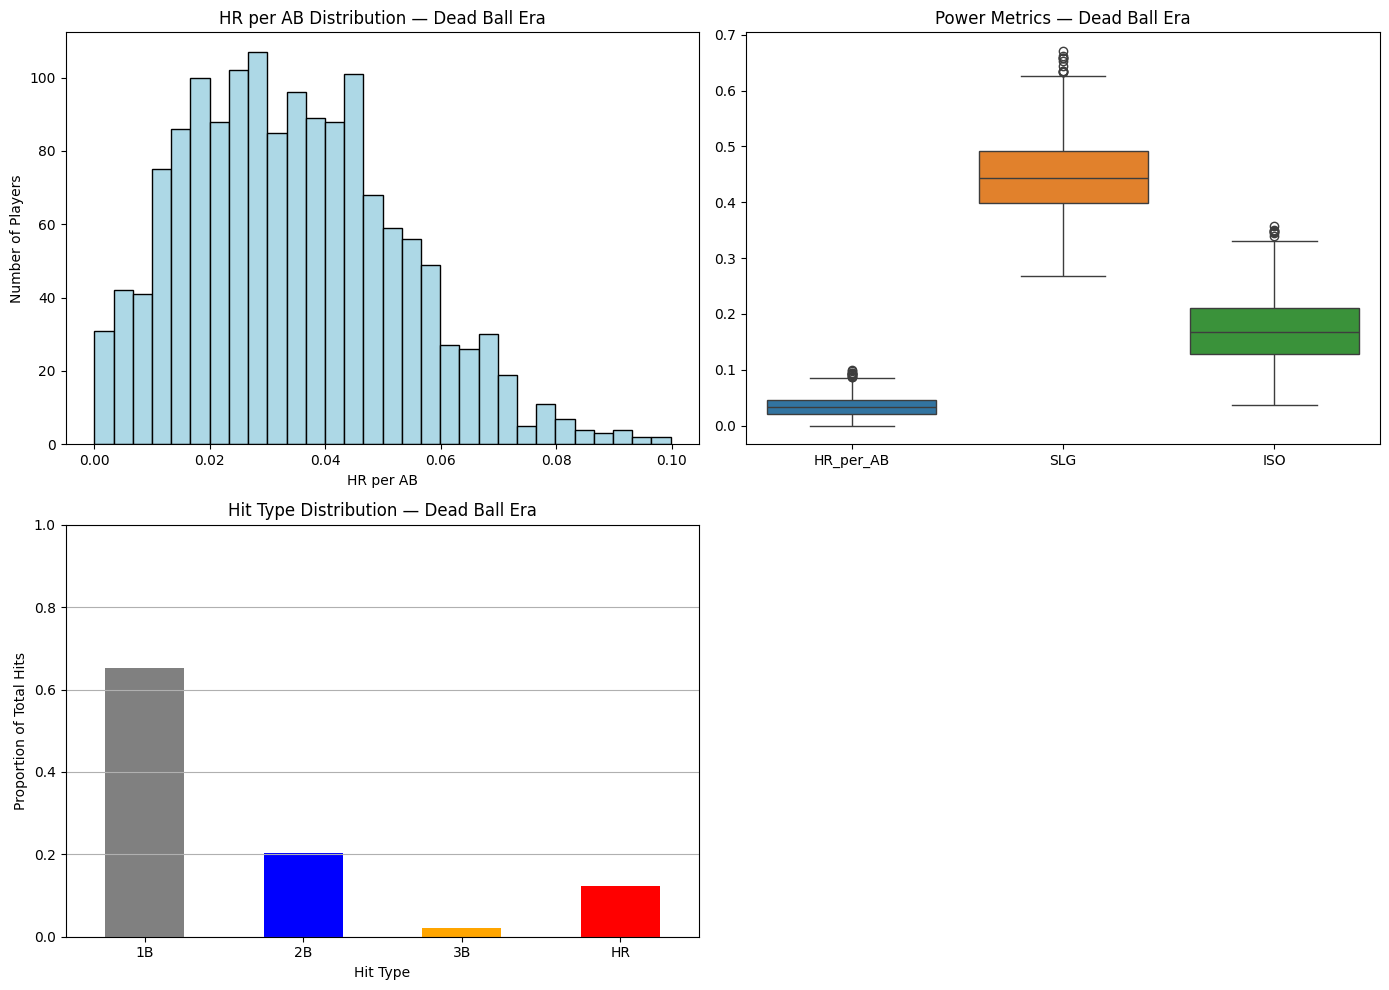

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram of HR per AB
axes[0, 0].hist(era_stats['HR_per_AB'], bins=30, color='lightblue', edgecolor='black')
axes[0, 0].set_title("HR per AB Distribution — Dead Ball Era")
axes[0, 0].set_xlabel("HR per AB")
axes[0, 0].set_ylabel("Number of Players")

# Plot 2: Boxplot of Power Metrics
sns.boxplot(data=era_stats[['HR_per_AB', 'SLG', 'ISO']], ax=axes[0, 1])
axes[0, 1].set_title("Power Metrics — Dead Ball Era")

# Plot 3: Bar chart of Hit Type Distribution
hit_dist.plot(kind='bar', color=['gray', 'blue', 'orange', 'red'], ax=axes[1, 0])
axes[1, 0].set_title('Hit Type Distribution — Dead Ball Era')
axes[1, 0].set_ylabel('Proportion of Total Hits')
axes[1, 0].set_xlabel('Hit Type')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(axis='y')

# Leave the bottom-right plot blank
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [7]:

# Drop rows with missing values (just in case)
era_clean = era_stats.dropna(subset=['ISO', 'SLG', 'HR_per_AB'])

# Define features and target
X = era_clean[['SLG', 'HR_per_AB']]
y = era_clean['ISO']

# Train-test split (just to simulate realistic usage, even if not critical here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
r2 = model.score(X_test, y_test)
print(f"R² Score: {r2:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")
print(f"Feature names: {X.columns.tolist()}")


R² Score: 0.9700
Intercept: -0.0390
Coefficients: [0.31358905 2.00631892]
Feature names: ['SLG', 'HR_per_AB']


C:\Users\sdeck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


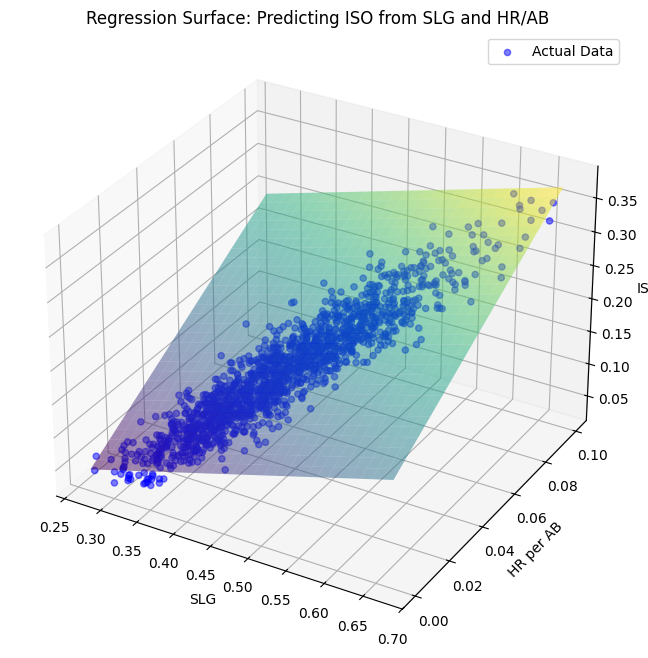

In [8]:
# Clean data
era_clean = era_stats.dropna(subset=['ISO', 'SLG', 'HR_per_AB'])
X = era_clean[['SLG', 'HR_per_AB']]
y = era_clean['ISO']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Create meshgrid for surface
slg_range = np.linspace(X['SLG'].min(), X['SLG'].max(), 30)
hrab_range = np.linspace(X['HR_per_AB'].min(), X['HR_per_AB'].max(), 30)
slg_grid, hrab_grid = np.meshgrid(slg_range, hrab_range)
iso_pred = model.predict(np.c_[slg_grid.ravel(), hrab_grid.ravel()]).reshape(slg_grid.shape)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['SLG'], X['HR_per_AB'], y, color='blue', alpha=0.5, label='Actual Data')
ax.plot_surface(slg_grid, hrab_grid, iso_pred, alpha=0.5, cmap='viridis')

ax.set_xlabel('SLG')
ax.set_ylabel('HR per AB')
ax.set_zlabel('ISO')
ax.set_title('Regression Surface: Predicting ISO from SLG and HR/AB')
plt.legend()
plt.show()


In [9]:
# Identify columns that are completely empty
empty_columns = [col for col in clean_era.columns if clean_era[col].isna().all()]

# Print the empty columns
print("Empty columns:", empty_columns)

Empty columns: ['EV', 'LA', 'Barrel%', 'HardHit%', 'maxEV']
